# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# List of city data
city_data = []

# Create counters
i = 0
set_count = 1

units = 'imperial'

print(f'Beginning Data Retrieval \n-----------------------------')

for index, city in enumerate(cities):
    i +=1
    
    query_url = url +'appid=' + weather_api_key +'&q='+ city + '&units=' + units

    response = requests.get(query_url).json()
    print(f'Processing Record {index} of Set {set_count} | {city}')
    if response['cod'] == '404':
          print(f'City not found. Skipping...')
    else:
        city_data.append({
            'City': response['name'],
            'Lat': response['coord']['lat'],
            'Lng': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind Speed': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
            })  
    
    if i == 49:
        i =0
        set_count +=1
        
print("------------------------------\nData Retrieval Complete\n------------------------------")   

Beginning Data Retrieval 
-----------------------------
Processing Record 0 of Set 1 | bredasdorp
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | luganville
Processing Record 3 of Set 1 | akdepe
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | mattru
Processing Record 8 of Set 1 | guanica
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | mandalgovi
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | road town
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | itarema
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hualmay
Processing Record 21 of Set 1 | inhambane
Processing Record 22 of Set 1 | mo

Processing Record 186 of Set 4 | borinskoye
Processing Record 187 of Set 4 | thompson
Processing Record 188 of Set 4 | egvekinot
Processing Record 189 of Set 4 | faanui
Processing Record 190 of Set 4 | brae
Processing Record 191 of Set 4 | puerto ayora
Processing Record 192 of Set 4 | virginia beach
Processing Record 193 of Set 4 | cartagena
Processing Record 194 of Set 4 | pochutla
Processing Record 195 of Set 4 | leningradskiy
Processing Record 196 of Set 5 | benguela
Processing Record 197 of Set 5 | upernavik
Processing Record 198 of Set 5 | malatya
Processing Record 199 of Set 5 | saint-philippe
Processing Record 200 of Set 5 | kruisfontein
Processing Record 201 of Set 5 | miraflores
Processing Record 202 of Set 5 | nabire
Processing Record 203 of Set 5 | cascais
Processing Record 204 of Set 5 | lamu
Processing Record 205 of Set 5 | saint george
Processing Record 206 of Set 5 | norman wells
Processing Record 207 of Set 5 | forchheim
Processing Record 208 of Set 5 | margate
Processi

Processing Record 369 of Set 8 | mackay
Processing Record 370 of Set 8 | salina
Processing Record 371 of Set 8 | tateyama
Processing Record 372 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 373 of Set 8 | nazareno
Processing Record 374 of Set 8 | jaen
Processing Record 375 of Set 8 | alcudia
Processing Record 376 of Set 8 | sibolga
Processing Record 377 of Set 8 | pisco
Processing Record 378 of Set 8 | sitka
Processing Record 379 of Set 8 | mabaruma
Processing Record 380 of Set 8 | zatoka
Processing Record 381 of Set 8 | luau
Processing Record 382 of Set 8 | atambua
Processing Record 383 of Set 8 | viligili
City not found. Skipping...
Processing Record 384 of Set 8 | el alto
Processing Record 385 of Set 8 | ulaanbaatar
Processing Record 386 of Set 8 | wamba
Processing Record 387 of Set 8 | inongo
Processing Record 388 of Set 8 | auki
Processing Record 389 of Set 8 | goderich
Processing Record 390 of Set 8 | doha
Processing Record 391 of Set 8 | mahanoro
Processing 

Processing Record 550 of Set 12 | merauke
Processing Record 551 of Set 12 | nata
Processing Record 552 of Set 12 | tevriz
Processing Record 553 of Set 12 | san jeronimo
Processing Record 554 of Set 12 | isangel
Processing Record 555 of Set 12 | vilhena
Processing Record 556 of Set 12 | sale
Processing Record 557 of Set 12 | ostrovnoy
Processing Record 558 of Set 12 | agadez
Processing Record 559 of Set 12 | aberdeen
Processing Record 560 of Set 12 | pechenga
Processing Record 561 of Set 12 | guajara-mirim
City not found. Skipping...
Processing Record 562 of Set 12 | kalmar
Processing Record 563 of Set 12 | ozgon
City not found. Skipping...
Processing Record 564 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 565 of Set 12 | talah
City not found. Skipping...
Processing Record 566 of Set 12 | tocopilla
Processing Record 567 of Set 12 | saldanha
Processing Record 568 of Set 12 | el quince
Processing Record 569 of Set 12 | fevralsk
City not found. Skipping...
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(city_data)
city_data.to_csv(output_data_file, index_label="City_ID")

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,61.79,69,100,2.89,ZA,1669059916
1,Carnarvon,-24.8667,113.6333,73.62,57,39,8.93,AU,1669059916
2,Luganville,-15.5333,167.1667,81.25,81,69,5.73,VU,1669060002
3,Akdepe,42.0551,59.3788,37.49,68,100,4.38,TM,1669060002
4,Bethel,41.3712,-73.4140,40.01,39,0,12.66,US,1669060002


In [7]:
lat = city_data["Lat"]
max_temp = city_data["Max Temp"]
humidity = city_data["Humidity"]
cloudiness = city_data["Cloudiness"]
wind_speed = city_data["Wind Speed"]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_data.sort_values(by = ['Humidity'], ascending = False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
590,Cherskiy,68.7500,161.3000,-33.38,100,92,3.44,RU,1669060227
125,Tiksi,71.6872,128.8694,-23.01,100,84,3.40,RU,1669060048
117,Severnyy,50.6770,36.5532,33.84,100,100,11.18,RU,1669060045
127,Aykhal,66.0000,111.5000,-18.98,100,97,4.90,RU,1669060049
131,Mehamn,71.0357,27.8492,39.11,100,75,6.91,NO,1669059856
...,...,...,...,...,...,...,...,...,...
156,Bilma,18.6853,12.9164,71.46,14,30,10.69,NE,1669060060
292,Saint-Louis,16.3333,-15.0000,85.59,14,5,9.91,SN,1669060113
225,Arlit,18.7369,7.3853,76.68,12,100,10.11,NE,1669060085
229,Gao,16.6362,1.6370,77.52,10,100,9.46,ML,1669060087


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

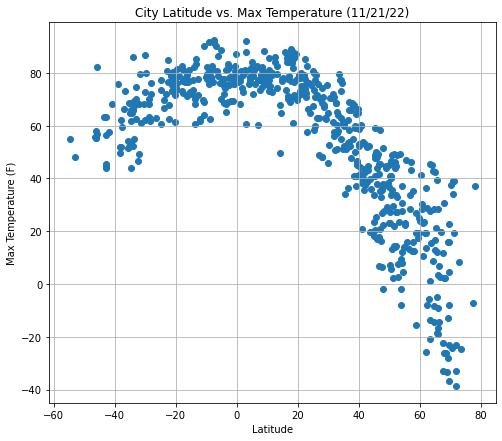

In [12]:
plt.figure(figsize=(8,7))

plt.scatter(lat, max_temp, linewidths=1, marker="o")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

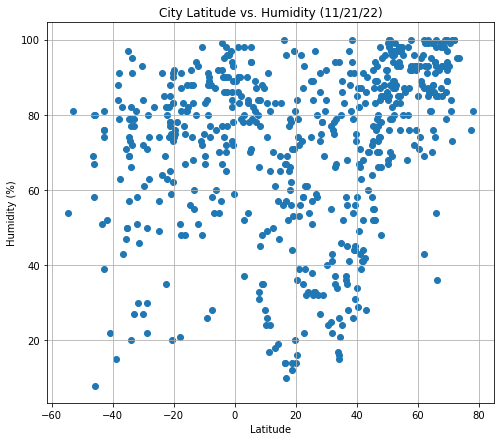

In [13]:
plt.figure(figsize=(8,7))
           
plt.scatter(lat, humidity, linewidths=1, marker="o")
           
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

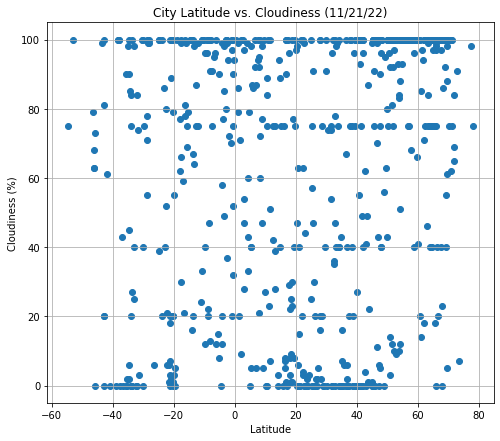

In [14]:
plt.figure(figsize=(8,7))

plt.scatter(lat, cloudiness, linewidths=1, marker="o")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

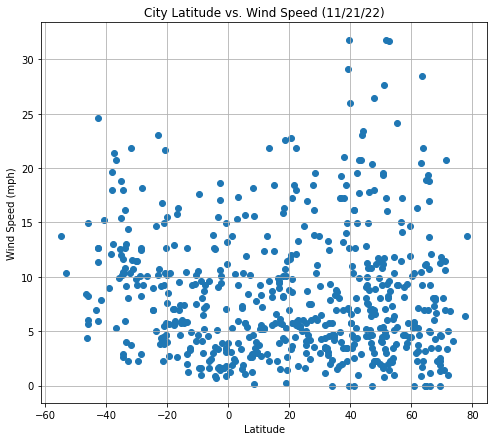

In [15]:
plt.figure(figsize=(8,7))

plt.scatter(lat, wind_speed, linewidths=1, marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.show()

## Linear Regression

In [16]:
nothern_hemisphere = city_data.loc[city_data["Lat"] >= 0.0]
nothern_hemisphere.reset_index(inplace=True)

southern_hemisphere = city_data.loc[city_data["Lat"] < 0.0]
southern_hemisphere.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8655827656206622


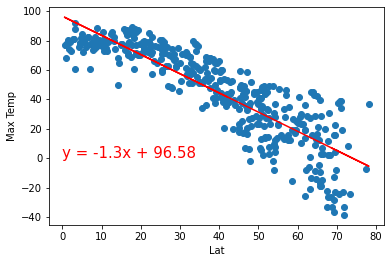

In [37]:
def plotLinearRegression(xdata,ydata,xlabel,ylabel,labelpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,labelpos,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (0,0)

plotLinearRegression(nothern_hemisphere[xlabel],nothern_hemisphere[ylabel],xlabel,ylabel,labelpos,5)

plt.show()    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6557411998293918


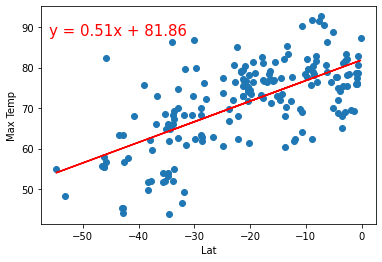

In [36]:
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (-56,88)

plotLinearRegression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,labelpos,6)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.408865757335513


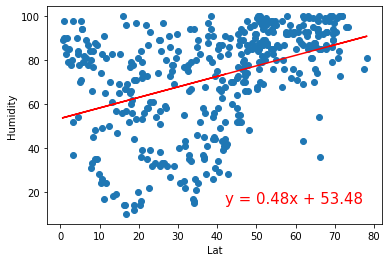

In [35]:
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (42,15)

plotLinearRegression(nothern_hemisphere[xlabel],nothern_hemisphere[ylabel],xlabel,ylabel,labelpos,7)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3089695939564864


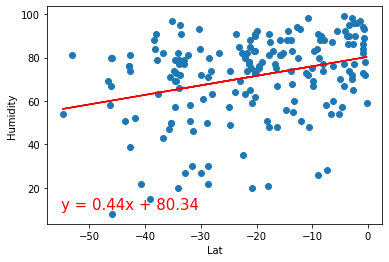

In [34]:
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (-55,10)

plotLinearRegression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,labelpos,8)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.258475144712857


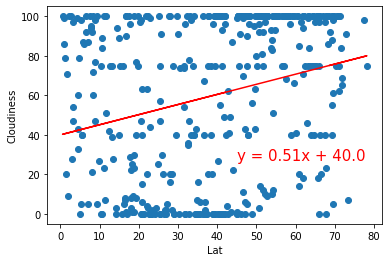

In [44]:
xlabel = "Lat"
ylabel = "Cloudiness"
labelpos = (45,27)

plotLinearRegression(nothern_hemisphere[xlabel],nothern_hemisphere[ylabel],xlabel,ylabel,labelpos,9)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19019013193900847


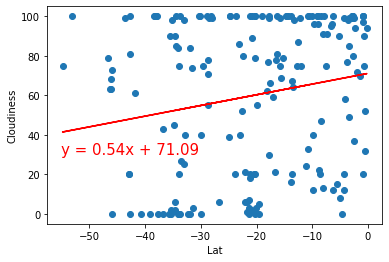

In [46]:
xlabel = "Lat"
ylabel = "Cloudiness"
labelpos = (-55,30)

plotLinearRegression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,labelpos,10)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03597236374537804


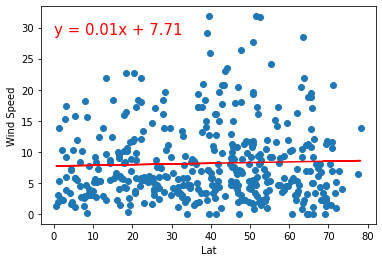

In [49]:
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (0,29)

plotLinearRegression(nothern_hemisphere[xlabel],nothern_hemisphere[ylabel],xlabel,ylabel,labelpos,11)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.35982317099290756


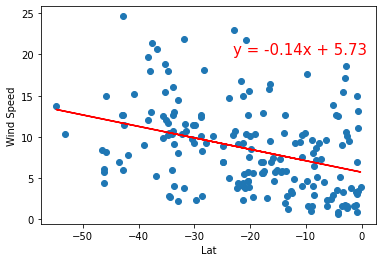

In [52]:
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (-23,20)

plotLinearRegression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,labelpos,12)

plt.show()